In [20]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
sns.set(style='white')

In [21]:
# Load data
train = pd.read_csv("/home/mekawy/Documents/Machine Learning/Datasets/digit-recognizer/train.csv")
test = pd.read_csv("/home/mekawy/Documents/Machine Learning/Datasets/digit-recognizer/test.csv")
train.shape

(42000, 785)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

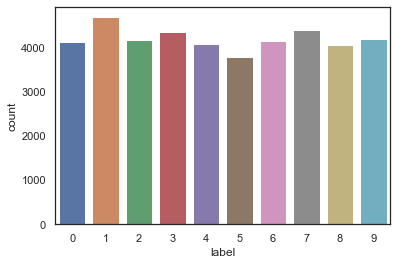

In [22]:
y_train = train['label']
X_train = train.drop(labels=['label'], axis= 1)
# free space from memory
del train
g = sns.countplot(y_train)
y_train.value_counts()

In [23]:
# Check Null Values
X_train.isnull().any().describe()
# There's no null values in X_train dataset
test.isnull().any().describe()
# There's no null values in Test dataset

count       784
unique        1
top       False
freq        784
dtype: object

In [24]:
# Normalization
X_train = X_train / 255.0
test = test / 255.0

In [25]:
# Reshape The data in 3 dimenstions ( H = 28  , W = 28 , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [26]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
y_train = to_categorical(y_train,num_classes=10)

In [27]:
# Splitting data into training and validation
from sklearn.model_selection import train_test_split
random_seed = 2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=random_seed)

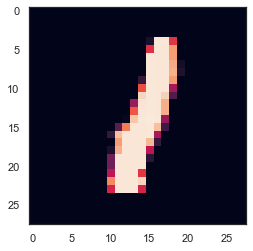

In [28]:
g = plt.imshow(X_train[20][:,:,0])

In [29]:
# Building model 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
model = Sequential()
model.add(Conv2D(32,kernel_size =(5,5),padding = 'same',activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(32,kernel_size =(5,5),padding = 'same',activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

In [30]:
from keras.optimizers import Adam ,RMSprop

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Set a learning rate annealer
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [32]:
epochs = 30
batch_size = 86

In [33]:
# Without data augmentation
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, 
         validation_data = (X_val, y_val), verbose = 2)


Train on 37800 samples, validate on 4200 samples
Epoch 1/30
 - 191s - loss: 0.2545 - accuracy: 0.9190 - val_loss: 0.0741 - val_accuracy: 0.9762
Epoch 2/30
 - 183s - loss: 0.0799 - accuracy: 0.9754 - val_loss: 0.0490 - val_accuracy: 0.9852
Epoch 3/30
 - 183s - loss: 0.0545 - accuracy: 0.9832 - val_loss: 0.0427 - val_accuracy: 0.9869
Epoch 4/30
 - 183s - loss: 0.0483 - accuracy: 0.9858 - val_loss: 0.0383 - val_accuracy: 0.9881
Epoch 5/30
 - 183s - loss: 0.0383 - accuracy: 0.9881 - val_loss: 0.0438 - val_accuracy: 0.9886
Epoch 6/30
 - 183s - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.0321 - val_accuracy: 0.9912
Epoch 7/30
 - 183s - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0289 - val_accuracy: 0.9919
Epoch 8/30
 - 183s - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.0350 - val_accuracy: 0.9919
Epoch 9/30
 - 183s - loss: 0.0256 - accuracy: 0.9912 - val_loss: 0.0278 - val_accuracy: 0.9936
Epoch 10/30
 - 183s - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0268 - val_accuracy: 0.9924

In [34]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1)

datagen.fit(X_train)

In [35]:
# Fit the model after augmentation
history = model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                              epochs=epochs,
                              validation_data=(X_val,y_val),
                              verbose=2,
                              steps_per_epoch=X_train.shape[0]//batch_size,
                              callbacks=[learning_rate_reduction]
                             )

Epoch 1/30
 - 187s - loss: 0.0982 - accuracy: 0.9718 - val_loss: 0.0238 - val_accuracy: 0.9945
Epoch 2/30


/home/mekawy/.local/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


 - 186s - loss: 0.0608 - accuracy: 0.9820 - val_loss: 0.0256 - val_accuracy: 0.9931
Epoch 3/30
 - 187s - loss: 0.0497 - accuracy: 0.9851 - val_loss: 0.0234 - val_accuracy: 0.9936
Epoch 4/30
 - 185s - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0220 - val_accuracy: 0.9938
Epoch 5/30
 - 185s - loss: 0.0450 - accuracy: 0.9870 - val_loss: 0.0200 - val_accuracy: 0.9945
Epoch 6/30
 - 186s - loss: 0.0421 - accuracy: 0.9872 - val_loss: 0.0228 - val_accuracy: 0.9945
Epoch 7/30
 - 186s - loss: 0.0401 - accuracy: 0.9883 - val_loss: 0.0191 - val_accuracy: 0.9955
Epoch 8/30
 - 186s - loss: 0.0367 - accuracy: 0.9894 - val_loss: 0.0232 - val_accuracy: 0.9952
Epoch 9/30
 - 186s - loss: 0.0391 - accuracy: 0.9891 - val_loss: 0.0217 - val_accuracy: 0.9940
Epoch 10/30
 - 186s - loss: 0.0323 - accuracy: 0.9908 - val_loss: 0.0168 - val_accuracy: 0.9948
Epoch 11/30
 - 186s - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0179 - val_accuracy: 0.9945
Epoch 12/30
 - 185s - loss: 0.0330 - accuracy: 0.9896 - val

In [36]:
from keras.models import save_model
model.save('modell.h5')


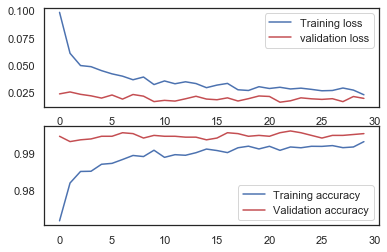

In [46]:
# Evaluate Model ( Training and validation Curves)

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend()

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend()

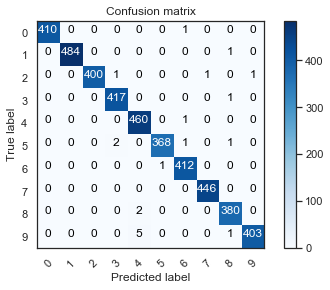

In [50]:
# Confusion Matrix to show the drewbacks
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

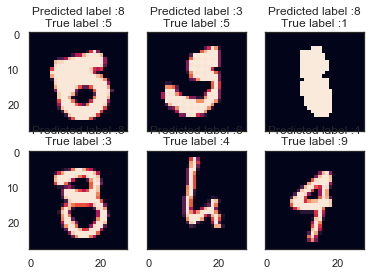

In [51]:
# Display some error results 

# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_val[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [52]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")